In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import csv
from pandas import DataFrame,date_range
import matplotlib.dates as mdates

           4             3             2
1.604e-09 x - 9.235e-07 x + 0.0001722 x - 0.01395 x + 0.7222


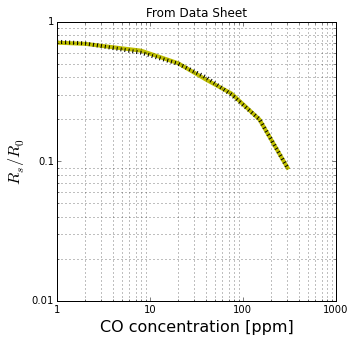

In [17]:
# the points from visual observation
X = [1,2,8,20,40,75,150,300]
Y = [0.72,0.7,0.6,0.5,0.4,0.3,0.2,0.09]

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

poly = np.poly1d(np.polyfit(X,Y,4)) # polynomial fitting function and order

ax1.set_title('From Data Sheet')
ax1.set_xlabel('CO concentration [ppm]',fontsize=16)
ax1.set_ylabel('$R_s/R_0$',fontsize=16)
ax1.loglog(X,poly(X),c='y',linewidth=4) # plot of a polyfit of the points
ax1.loglog(X,Y,':',c='black',linewidth=4) # plot of my points
ax1.set_yticklabels([0,0.01,0.1,1])
ax1.set_xticklabels([0,1,10,100,1000])
ax1.grid(which='minor')

print poly

            4             3            2
-7.634e-09 x + 9.486e-06 x + 0.002139 x + 0.04109 x + 2.564


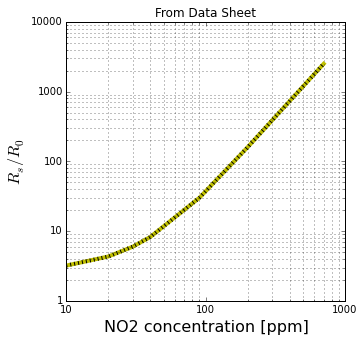

In [20]:
# the points from visual observation
X2 = [10,20,30,40,90,200,700]
Y2 = [3.2,4.3,6,8.2,30,160,2500]

fig = plt.figure(figsize=(5,5))
ax2 = fig.add_subplot(111)

poly2 = np.poly1d(np.polyfit(X2,Y2,4)) # polynomial fitting function and order

ax2.set_title('From Data Sheet')
ax2.set_xlabel('NO2 concentration [ppm]',fontsize=16)
ax2.set_ylabel('$R_s/R_0$',fontsize=16)
ax2.loglog(X2,poly2(X2),c='y',linewidth=4) # plot of a polyfit of the points
ax2.loglog(X2,Y2,':',c='black',linewidth=4) # plot of my points
ax2.set_yticklabels([0,1,10,100,1000,10000])
ax2.set_xticklabels([1,10,100,1000])
ax2.grid(which='minor')

print poly2

In [53]:
# One idea to find roots --- another might be to switch the axes on the graph
print np.roots(poly)
print np.roots(poly2)

[ 292.29351061 +0.j          199.56918802 +0.j           41.98693248+77.18661654j
   41.98693248-77.18661654j]
[ 1439.84478470 +0.j          -182.91782668 +0.j
    -7.17545847+34.97933869j    -7.17545847-34.97933869j]


In [ ]:
# Second Idea is to take the inverse polynomial relationships so we can plug in x (Rs) and get y (ppm)

      4        3        2
3016 x - 7142 x + 6547 x - 2841 x + 507.8


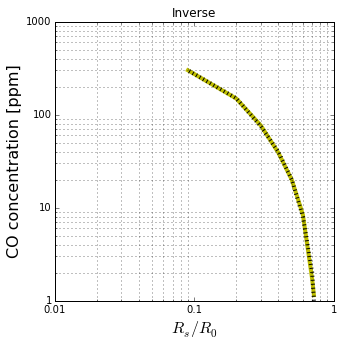

In [52]:
# doing above in reverse
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

inv_poly = np.poly1d(np.polyfit(Y,X,4)) # polynomial fitting function and order

ax1.set_title('Inverse')
ax1.set_ylabel('CO concentration [ppm]',fontsize=16)
ax1.set_xlabel('$R_s/R_0$',fontsize=16)
ax1.loglog(Y,inv_poly(Y),c='y',linewidth=4) # plot of a polyfit of the points
ax1.loglog(Y,X,':',c='black',linewidth=4) # plot of my points
ax1.set_xticklabels([0,0.01,0.1,1])
ax1.set_yticklabels([0,1,10,100,1000])
ax1.grid(which='minor')

print inv_poly

           4             3         2
-3.25e-07 x + 0.0008805 x - 0.173 x + 7.799 x - 11.79


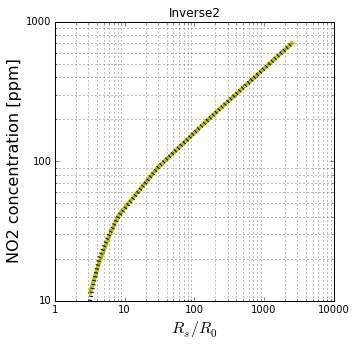

In [56]:
fig = plt.figure(figsize=(5,5))
ax2 = fig.add_subplot(111)

inv_poly2 = np.poly1d(np.polyfit(Y2,X2,4)) # polynomial fitting function and order

ax2.set_title('Inverse2')
ax2.set_ylabel('NO2 concentration [ppm]',fontsize=16)
ax2.set_xlabel('$R_s/R_0$',fontsize=16)
ax2.loglog(Y2,inv_poly2(Y2),c='y',linewidth=4) # plot of a polyfit of the points
ax2.loglog(Y2,X2,':',c='black',linewidth=4) # plot of my points
ax2.set_xticklabels([0,1,10,100,1000,10000])
ax2.set_yticklabels([1,10,100,1000])
ax2.grid(which='minor')

print inv_poly2

In [57]:
# Read in some data from ride
SCK1 = pd.read_csv('SCK_rides/Mar30_SCK1.csv')

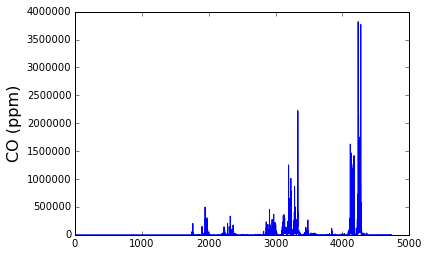

In [115]:
CO_data = SCK1[' Carbon Monxide ( kOhm) ']/500 # setting R_0
CO_ppm = inv_poly(CO_data)
plt.plot(CO_ppm)
plt.ylabel('CO (ppm)', fontsize=16)

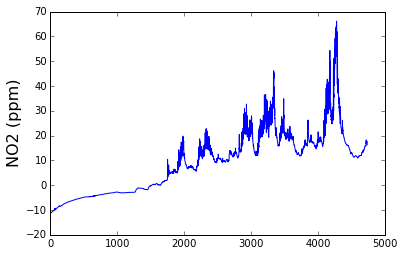

In [111]:
NO2_data = SCK1[' Nitrogen Dioxide ( kOhm) ']/10 # setting R_0
NO2_ppm = inv_poly2(NO2_data)
plt.plot(NO2_ppm)
plt.ylabel('NO2 (ppm)', fontsize=16)